# Tugas Akhir Pengenalan Pola

# Download the Data

In [1]:
# Install gdown if not already installed
!pip install gdown

# Import gdown
import gdown

# Link Google Drive file
url = 'https://drive.google.com/uc?id=1QvluzGHbalr_-PQ4oeh8QtvbaGhMMwmr'

# Download the file
output = 'dataset4.zip'  # You can change this to your desired output file name
gdown.download(url, output, quiet=False)

# Verify the file exists
import os
os.listdir()


Downloading...
From: https://drive.google.com/uc?id=1QvluzGHbalr_-PQ4oeh8QtvbaGhMMwmr
To: /content/dataset4.zip
100%|██████████| 14.7M/14.7M [00:00<00:00, 77.2MB/s]


['.config', 'dataset4.zip', 'sample_data']

In [2]:
import zipfile

# Nama file ZIP yang telah diunggah
zip_file_name = 'dataset4.zip'

# Direktori untuk mengekstrak file
extract_dir = 'extracted_dataset'

# Membuat direktori jika belum ada
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Mengekstrak file ZIP
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


# Loading the Data

In [3]:
import cv2
import numpy as np
from tqdm import tqdm
from skimage.feature import hog
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [4]:
def load_dataset(folder_path, target_size=(32, 32)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".png") or filename.endswith(".jpg"):  # Sesuaikan dengan ekstensi file gambar Anda
            label = int(filename.split('_')[0])
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            # Resize gambar ke ukuran target
            img = cv2.resize(img, target_size)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)


In [5]:
# Path ke folder dataset
folder_path = '/content/extracted_dataset/DataSet_04/'  # Ganti dengan path yang sesuai

# Memuat dataset
images, labels = load_dataset(folder_path)

# Menampilkan beberapa informasi tentang dataset
print(f"Total images: {len(images)}")
print(f"Labels: {set(labels)}")

Total images: 7543
Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


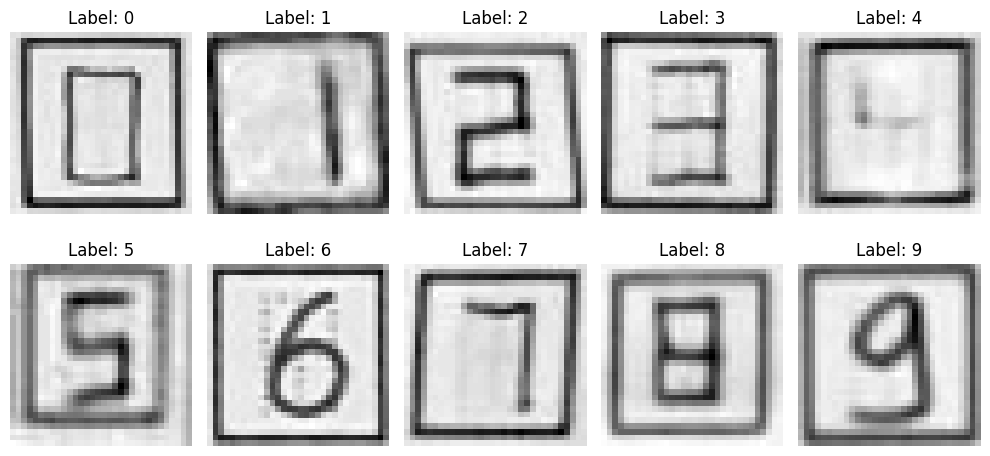

In [6]:
# Menampilkan 10 gambar dari 0 sampai 9
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Memetakan label ke gambar
label_to_image = {label: image for label, image in zip(labels, images)}

for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(label_to_image[i], cmap='gray')
    ax.set_title(f"Label: {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()


# Feature Extraction using HOG

In [7]:
# Parameter HOG
hog_params = {
    'orientations': 9,
    'pixels_per_cell': (8, 8),
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys'
}

In [8]:
# Fungsi untuk ekstraksi fitur HOG dan menampilkan gambar HOG
def display_hog_features(images, labels, num_images=5):
    for i in range(num_images):
        hog_feature, hog_image = hog(images[i], visualize=True, **hog_params)
        plt.imshow(hog_image, cmap='gray')
        plt.title(f"HOG Feature - Label: {labels[i]}")
        plt.show()


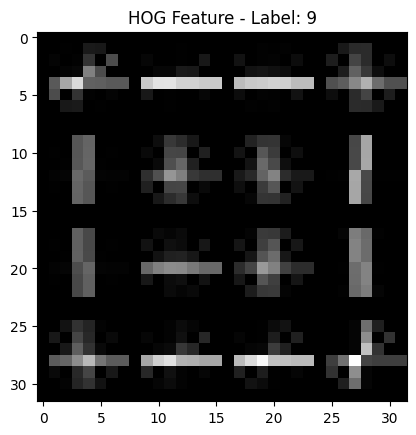

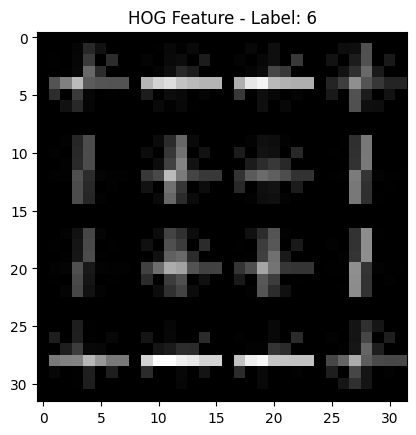

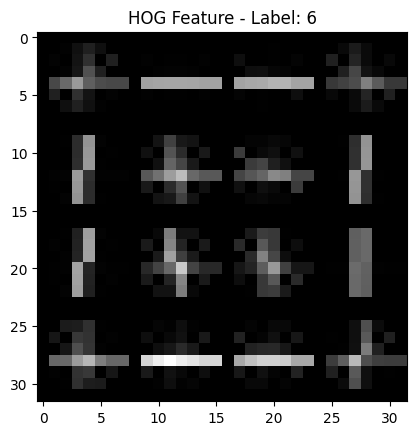

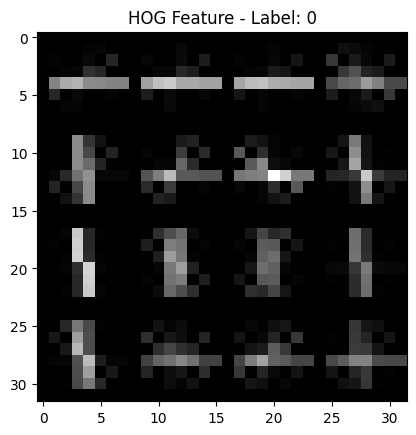

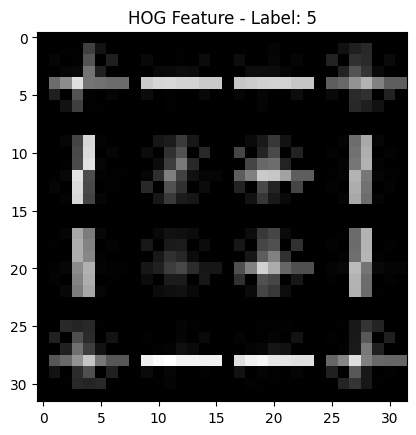

In [9]:

# Menampilkan hasil HOG untuk beberapa gambar pertama
display_hog_features(images, labels)


In [10]:
# Fungsi untuk ekstraksi fitur HOG
def extract_hog_features(images):
    hog_features = []
    for img in images:
        hog_feature = hog(img, **hog_params)
        hog_features.append(hog_feature)
    return np.array(hog_features)

In [11]:
# Ekstraksi fitur HOG dari gambar
hog_features = extract_hog_features(images)

# KNN Training and Model Evaluation

## Global KNN

In [27]:
# Variabel global untuk menyimpan model KNN yang terakhir dilatih
global_knn_model = None

In [28]:
def train_and_evaluate(X_train, X_test, y_train, y_test):
    global global_knn_model
    # Membuat dan melatih model KNN
    knn = KNeighborsClassifier(n_neighbors=3)  # Anda bisa mengubah jumlah tetangga sesuai kebutuhan
    knn.fit(X_train, y_train)
    global_knn_model = knn  # Menyimpan model KNN yang terakhir dilatih

    # Memprediksi dan mengevaluasi model
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n[i] Accuracy: {accuracy}\n")
    print("[i] Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(labels))
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Cross-Validation
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
    print(f"\n[i] Cross-Validation Scores: {cv_scores}")
    print(f"[i] Mean CV Score: {np.mean(cv_scores)}")
    return accuracy

In [29]:
# # Normalisasi fitur
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# tidak dipakai karena menurunkan akurasi

## Experiment 1: Akurasi sistem DENGAN EKSTRAKSI FITUR VS Akurasi sistem TANPA EKSTRAKSI FITUR

### With Extraction Feature


[i] Dengan Ekstraksi Fitur HOG:

[i] Accuracy: 0.9383697813121272

[i] Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       127
           1       0.93      0.99      0.96       157
           2       0.95      0.97      0.96       172
           3       0.93      0.92      0.93       156
           4       0.87      0.95      0.91       161
           5       0.97      0.96      0.97       154
           6       0.96      0.99      0.97       154
           7       0.98      0.96      0.97       129
           8       0.93      0.89      0.91       141
           9       0.94      0.82      0.88       158

    accuracy                           0.94      1509
   macro avg       0.94      0.94      0.94      1509
weighted avg       0.94      0.94      0.94      1509



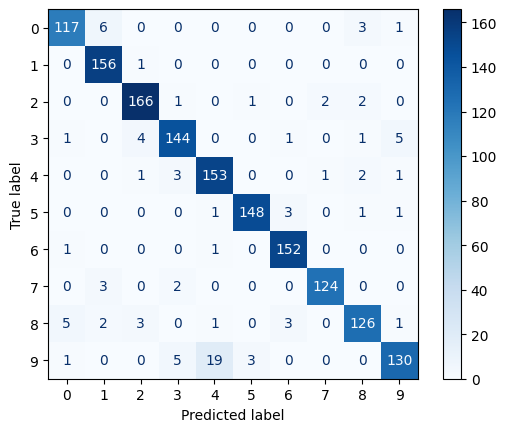


[i] Cross-Validation Scores: [0.94283347 0.94283347 0.94946147 0.94780447 0.94029851]
[i] Mean CV Score: 0.9446462797858265


In [30]:
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)
print("\n[i] Dengan Ekstraksi Fitur HOG:")
accuracy_hog = train_and_evaluate(X_train, X_test, y_train, y_test)

### Without Extraction Feature


 [i] Tanpa Ekstraksi Fitur HOG:

[i] Accuracy: 0.40821736249171636

[i] Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.58      0.44       127
           1       0.51      0.90      0.65       157
           2       0.38      0.47      0.42       172
           3       0.23      0.34      0.28       156
           4       0.55      0.54      0.55       161
           5       0.34      0.31      0.32       154
           6       0.43      0.21      0.29       154
           7       0.56      0.40      0.47       129
           8       0.39      0.17      0.24       141
           9       0.41      0.15      0.21       158

    accuracy                           0.41      1509
   macro avg       0.42      0.41      0.39      1509
weighted avg       0.42      0.41      0.39      1509



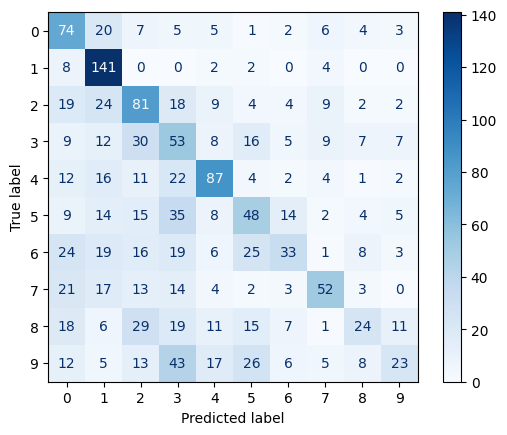


[i] Cross-Validation Scores: [0.42833471 0.43247722 0.41425021 0.46396023 0.4278607 ]
[i] Mean CV Score: 0.4333766132057195


In [31]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(images.reshape(len(images), -1), labels, test_size=0.2, random_state=42)
print("\n [i] Tanpa Ekstraksi Fitur HOG:")
accuracy_raw = train_and_evaluate(X_train_raw, X_test_raw, y_train_raw, y_test_raw)

## Experiment 2: Akurasi sistem dengan proporsi pembagian data latih dan data uji = 60:40 ; 70:30 ; 80:20


In [32]:
# Fungsi untuk melakukan eksperimen dengan berbagai proporsi data
def experiment_with_different_splits(features, labels):
    splits = [0.4, 0.3, 0.2]
    for test_size in splits:
        print(f"\n[i] Proporsi data uji: {int(test_size*100)}%")
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=42)
        train_and_evaluate(X_train, X_test, y_train, y_test)


[i] Eksperimen dengan Ekstraksi Fitur HOG:

[i] Proporsi data uji: 40%

[i] Accuracy: 0.9410205434062293

[i] Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       281
           1       0.92      0.99      0.96       311
           2       0.97      0.96      0.97       347
           3       0.92      0.94      0.93       291
           4       0.89      0.94      0.91       309
           5       0.98      0.95      0.97       313
           6       0.94      0.98      0.96       295
           7       0.98      0.95      0.97       282
           8       0.92      0.94      0.93       286
           9       0.93      0.83      0.88       303

    accuracy                           0.94      3018
   macro avg       0.94      0.94      0.94      3018
weighted avg       0.94      0.94      0.94      3018



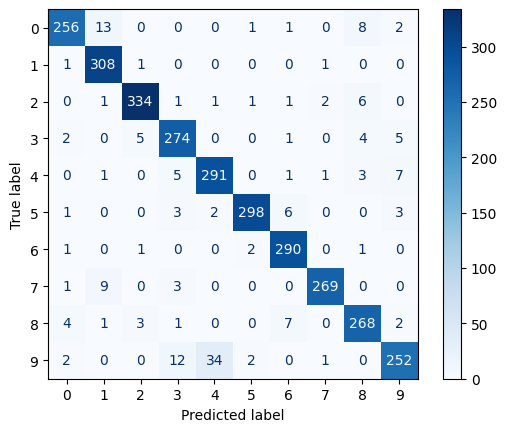


[i] Cross-Validation Scores: [0.93922652 0.94364641 0.93812155 0.92928177 0.94033149]
[i] Mean CV Score: 0.938121546961326

[i] Proporsi data uji: 30%

[i] Accuracy: 0.9399027839151569

[i] Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       205
           1       0.92      0.99      0.96       232
           2       0.97      0.97      0.97       259
           3       0.92      0.94      0.93       232
           4       0.88      0.95      0.91       228
           5       0.97      0.95      0.96       243
           6       0.95      0.98      0.96       214
           7       0.98      0.95      0.97       207
           8       0.92      0.91      0.92       209
           9       0.94      0.83      0.88       234

    accuracy                           0.94      2263
   macro avg       0.94      0.94      0.94      2263
weighted avg       0.94      0.94      0.94      2263



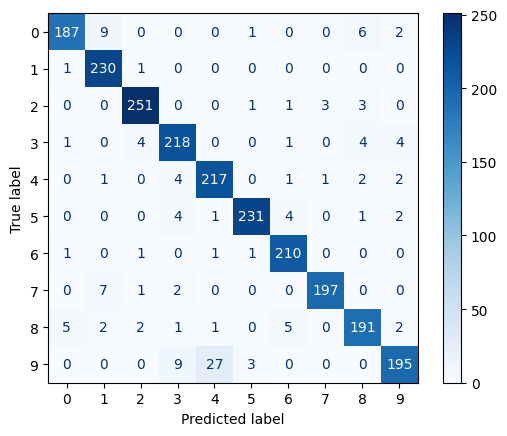


[i] Cross-Validation Scores: [0.94223485 0.94128788 0.94034091 0.93844697 0.93844697]
[i] Mean CV Score: 0.9401515151515152

[i] Proporsi data uji: 20%

[i] Accuracy: 0.9383697813121272

[i] Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       127
           1       0.93      0.99      0.96       157
           2       0.95      0.97      0.96       172
           3       0.93      0.92      0.93       156
           4       0.87      0.95      0.91       161
           5       0.97      0.96      0.97       154
           6       0.96      0.99      0.97       154
           7       0.98      0.96      0.97       129
           8       0.93      0.89      0.91       141
           9       0.94      0.82      0.88       158

    accuracy                           0.94      1509
   macro avg       0.94      0.94      0.94      1509
weighted avg       0.94      0.94      0.94      1509



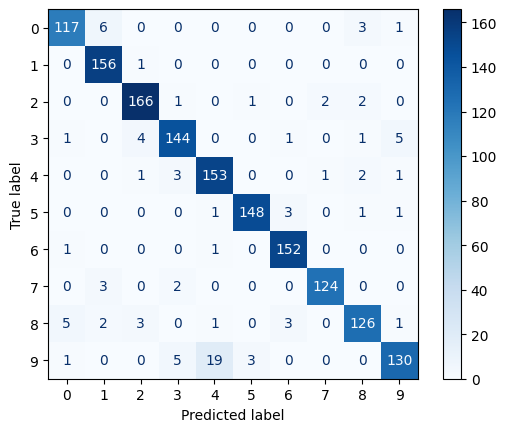


[i] Cross-Validation Scores: [0.94283347 0.94283347 0.94946147 0.94780447 0.94029851]
[i] Mean CV Score: 0.9446462797858265


In [33]:
print("\n[i] Eksperimen dengan Ekstraksi Fitur HOG:")
experiment_with_different_splits(hog_features, labels)


[i] Eksperimen tanpa Ekstraksi Fitur HOG:

[i] Proporsi data uji: 40%

[i] Accuracy: 0.4039098740888005

[i] Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.59      0.45       281
           1       0.52      0.88      0.66       311
           2       0.36      0.42      0.39       347
           3       0.23      0.35      0.28       291
           4       0.50      0.54      0.52       309
           5       0.37      0.31      0.34       313
           6       0.45      0.23      0.30       295
           7       0.59      0.40      0.48       282
           8       0.39      0.14      0.21       286
           9       0.31      0.15      0.20       303

    accuracy                           0.40      3018
   macro avg       0.41      0.40      0.38      3018
weighted avg       0.41      0.40      0.38      3018



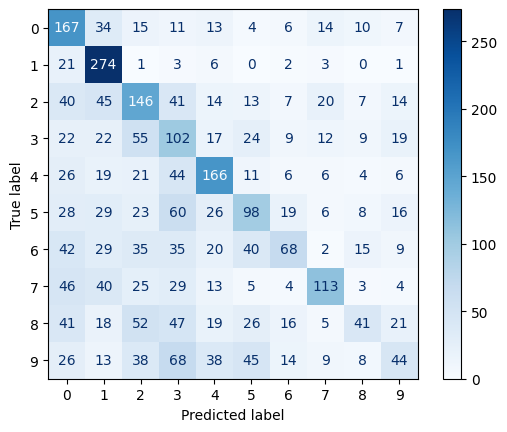


[i] Cross-Validation Scores: [0.40883978 0.37790055 0.40331492 0.39779006 0.38453039]
[i] Mean CV Score: 0.394475138121547

[i] Proporsi data uji: 30%

[i] Accuracy: 0.4158197083517455

[i] Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.60      0.47       205
           1       0.52      0.91      0.66       232
           2       0.35      0.42      0.38       259
           3       0.26      0.38      0.31       232
           4       0.53      0.56      0.54       228
           5       0.38      0.32      0.35       243
           6       0.42      0.24      0.30       214
           7       0.63      0.41      0.50       207
           8       0.44      0.17      0.24       209
           9       0.33      0.14      0.20       234

    accuracy                           0.42      2263
   macro avg       0.42      0.41      0.40      2263
weighted avg       0.42      0.42      0.39      2263



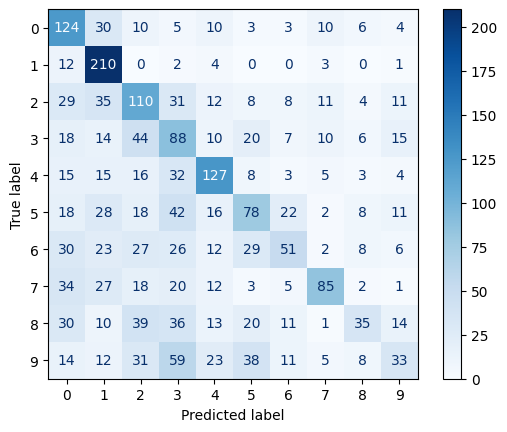


[i] Cross-Validation Scores: [0.41761364 0.39583333 0.43655303 0.41098485 0.40435606]
[i] Mean CV Score: 0.41306818181818183

[i] Proporsi data uji: 20%

[i] Accuracy: 0.40821736249171636

[i] Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.58      0.44       127
           1       0.51      0.90      0.65       157
           2       0.38      0.47      0.42       172
           3       0.23      0.34      0.28       156
           4       0.55      0.54      0.55       161
           5       0.34      0.31      0.32       154
           6       0.43      0.21      0.29       154
           7       0.56      0.40      0.47       129
           8       0.39      0.17      0.24       141
           9       0.41      0.15      0.21       158

    accuracy                           0.41      1509
   macro avg       0.42      0.41      0.39      1509
weighted avg       0.42      0.41      0.39      1509



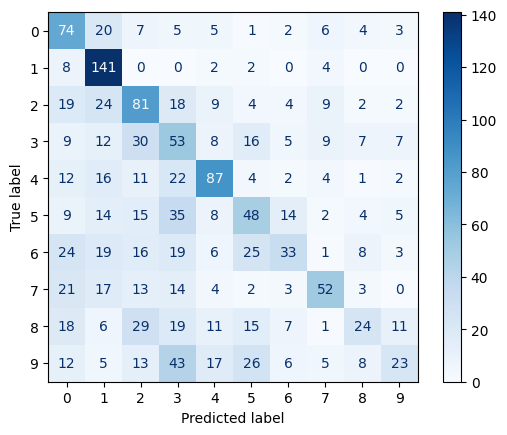


[i] Cross-Validation Scores: [0.42833471 0.43247722 0.41425021 0.46396023 0.4278607 ]
[i] Mean CV Score: 0.4333766132057195


In [34]:
print("\n[i] Eksperimen tanpa Ekstraksi Fitur HOG:")
experiment_with_different_splits(images.reshape(len(images), -1), labels)

## Best KNN model

In [35]:
# Membagi data menjadi train dan test set dengan test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

In [36]:
# Membuat dan melatih model KNN
global_knn_model = KNeighborsClassifier(n_neighbors=3)
global_knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
# Memprediksi dan mengevaluasi model
y_pred = global_knn_model.predict(X_test)
print(f"[i] Accuracy: {accuracy_score(y_test, y_pred)} \n")
print("[i] Classification Report:")
print(classification_report(y_test, y_pred))

[i] Accuracy: 0.9383697813121272 

[i] Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       127
           1       0.93      0.99      0.96       157
           2       0.95      0.97      0.96       172
           3       0.93      0.92      0.93       156
           4       0.87      0.95      0.91       161
           5       0.97      0.96      0.97       154
           6       0.96      0.99      0.97       154
           7       0.98      0.96      0.97       129
           8       0.93      0.89      0.91       141
           9       0.94      0.82      0.88       158

    accuracy                           0.94      1509
   macro avg       0.94      0.94      0.94      1509
weighted avg       0.94      0.94      0.94      1509



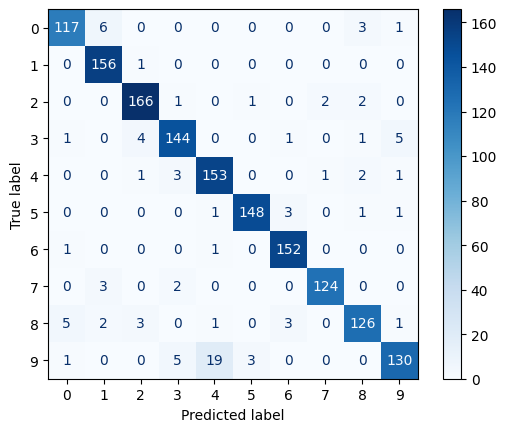

In [38]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(labels))
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [39]:
# Cross-Validation
cv_scores = cross_val_score(global_knn_model, hog_features, labels, cv=5)
print(f"[i] Cross-Validation Scores: {cv_scores}")
print(f"[i] Mean CV Score: {np.mean(cv_scores)}")

[i] Cross-Validation Scores: [0.94102054 0.94698476 0.94499669 0.93965517 0.94827586]
[i] Mean CV Score: 0.9441866045108659


# Predict new images

In [40]:
# Fungsi untuk memprediksi gambar yang diunggah
def predict_image(image_path):
    global global_knn_model
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Menggunakan tqdm untuk menampilkan progress bar saat resize dan ekstraksi fitur
    with tqdm(total=2, desc="Processing Image", unit="step") as pbar:
        img_resized = cv2.resize(img, (32, 32))  # Sesuaikan ukuran jika diperlukan
        pbar.update(1)  # Progress setelah resize

        hog_feature, hog_image = hog(img_resized, visualize=True, **hog_params)
        pbar.update(1)  # Progress setelah ekstraksi HOG

    hog_feature = hog_feature.reshape(1, -1)  # Reshape to 2D array
    prediction = global_knn_model.predict(hog_feature)

    print("")

    # Menampilkan gambar
    plt.imshow(img, cmap='gray')
    plt.title(f"Prediksi: {prediction[0]}")
    plt.axis('off')
    plt.show()

    print("")

    # Menampilkan fitur HOG
    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title("HOG Features")
    plt.axis('off')

    return prediction[0]

In [41]:
# Mengunggah gambar
uploaded = files.upload()

Saving C_3471011002024_1_2.jpg to C_3471011002024_1_2.jpg


Processing Image: 100%|██████████| 2/2 [00:00<00:00, 231.22step/s]

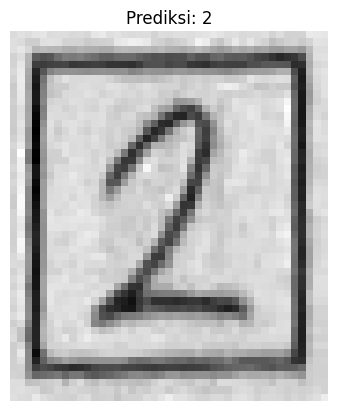


[i] Gambar: C_3471011002024_1_2.jpg, 
[i] Prediksi: 2 



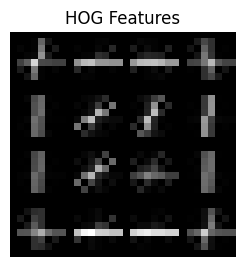

In [42]:
for fn in uploaded.keys():
    # Simpan file yang diunggah
    with open(fn, 'wb') as f:
        f.write(uploaded[fn])

    # Lakukan prediksi pada gambar yang diunggah
    prediction = predict_image(fn)
    print(f"""[i] Gambar: {fn},
[i] Prediksi: {prediction} \n""")